<a href="https://colab.research.google.com/github/nik8839/demohtml/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [46]:
def plot_sample(X,Y,index):
 plt.figure(figsize=(15,2))
 plt.imshow(X[index])
 plt.xlabel(classes[Y[index]])

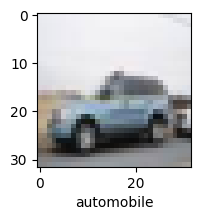

In [47]:
plot_sample(x_train,y_train,676)

In [36]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [39]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [40]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [41]:
classes[9]

'truck'

In [42]:
classes[y_train[23]]

'frog'

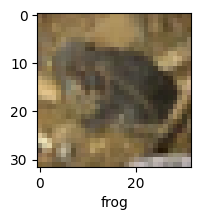

In [48]:
plot_sample(x_train,y_train,23)

In [49]:
x_train=x_train/255
x_test=x_test/255

In [58]:
y_train.shape

(50000, 1)

In [62]:
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
                keras.layers.Dense(3000,activation='sigmoid'),

    ]
)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
#model.fit(x_train,y_train,epochs=5)

In [64]:
model.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 192s 123ms/step - loss: nan - accuracy: 0.1000


In [66]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(ele) for ele in y_pred]
print("confusion matrix\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 12s 37ms/step
confusion matrix
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
##CNN Cifar_10 datset


In [71]:
cnn_model=keras.Sequential(
    [

     keras.layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
     keras.layers.MaxPool2D((2,2)),
      keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
     keras.layers.MaxPool2D((2,2)),


        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(10,activation='relu'),
                keras.layers.Dense(3000,activation='softmax'),

    ]
)
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [72]:
cnn_model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 85s 53ms/step - loss: 1.8924 - accuracy: 0.3153
Epoch 2/3
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2550 - accuracy: 0.5445
Epoch 3/3
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1091 - accuracy: 0.6023


In [73]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=cnn_model.predict(x_test)
y_pred_classes=[np.argmax(ele) for ele in y_pred]
print("confusion matrix\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 12ms/step
confusion matrix
               precision    recall  f1-score   support

           0       0.60      0.77      0.67      1000
           1       0.74      0.78      0.76      1000
           2       0.43      0.28      0.34      1000
           3       0.40      0.31      0.35      1000
           4       0.47      0.57      0.52      1000
           5       0.60      0.44      0.51      1000
           6       0.70      0.72      0.71      1000
           7       0.53      0.82      0.64      1000
           8       0.81      0.66      0.72      1000
           9       0.74      0.67      0.70      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



In [74]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 28ms/step - loss: 1.1316 - accuracy: 0.6019


[1.131614327430725, 0.6018999814987183]

In [75]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 14s 45ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [78]:
y_test=y_test.reshape(-1,)

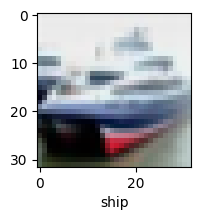

In [88]:
plot_sample(x_test,y_test,1)

In [81]:
cl=cnn_model.predict(x_test)

313/313 [==============================] - 7s 21ms/step


In [89]:
classes[np.argmax(cl[1])]

'ship'

In [91]:
y_classes=[np.argmax(ele) for ele in cl]
y_classes[:5]

[3, 8, 1, 0, 6]

In [92]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)